In [ ]:
%pip install kaggle --upgrade --quiet
import numpy as np

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'your_kaggle_username'
os.environ['KAGGLE_KEY'] = 'your_kaggle_key'
!kaggle datasets download -d omkargurav/face-mask-dataset --path . --unzip

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 75% 123M/163M [00:00<00:00, 428MB/s] 
100% 163M/163M [00:00<00:00, 413MB/s]


In [ ]:
import os
from PIL import Image
import numpy as np

# Define the path to the dataset
dataset_path = './data'

# Load the images and labels
images = []
labels = []

# Assuming the 'with_mask' and 'without_mask' folders are within the 'data' directory
mask_path = os.path.join(dataset_path, 'with_mask')
no_mask_path = os.path.join(dataset_path, 'without_mask')

# Load images with mask
for img_name in os.listdir(mask_path):
    img_path = os.path.join(mask_path, img_name)
    try:
        img = Image.open(img_path).convert('RGB').resize((128, 128)) # Convert to RGB and Resize
        images.append(np.array(img))
        labels.append(1) # 1 for with mask
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        continue


# Load images without mask
for img_name in os.listdir(no_mask_path):
    img_path = os.path.join(no_mask_path, img_name)
    try:
        img = Image.open(img_path).convert('RGB').resize((128, 128)) # Convert to RGB and Resize
        images.append(np.array(img))
        labels.append(0) # 0 for without mask
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        continue

images = np.array(images)
labels = np.array(labels)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Images shape: (7553, 128, 128, 3)
Labels shape: (7553,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6042, 128, 128, 3)
X_test shape: (1511, 128, 128, 3)
y_train shape: (6042,)
y_test shape: (1511,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
datagen.fit(X_train)

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the last convolutional block
last_conv_block_layer_names = [
    'conv5_block3_1_conv', 'conv5_block3_1_bn', 'conv5_block3_1_relu',
    'conv5_block3_2_conv', 'conv5_block3_2_bn', 'conv5_block3_2_relu',
    'conv5_block3_3_conv', 'conv5_block3_3_bn', 'conv5_block3_3_relu',
    'conv5_block3_add', 'conv5_block3_out'
]

for layer in base_model.layers:
    if layer.name in last_conv_block_layer_names:
        layer.trainable = True

for layer in base_model.layers:
    print(f"{layer.name}: {layer.trainable}")

input_layer: False
conv1_pad: False
conv1_conv: False
conv1_bn: False
conv1_relu: False
pool1_pad: False
pool1_pool: False
conv2_block1_1_conv: False
conv2_block1_1_bn: False
conv2_block1_1_relu: False
conv2_block1_2_conv: False
conv2_block1_2_bn: False
conv2_block1_2_relu: False
conv2_block1_0_conv: False
conv2_block1_3_conv: False
conv2_block1_0_bn: False
conv2_block1_3_bn: False
conv2_block1_add: False
conv2_block1_out: False
conv2_block2_1_conv: False
conv2_block2_1_bn: False
conv2_block2_1_relu: False
conv2_block2_2_conv: False
conv2_block2_2_bn: False
conv2_block2_2_relu: False
conv2_block2_3_conv: False
conv2_block2_3_bn: False
conv2_block2_add: False
conv2_block2_out: False
conv2_block3_1_conv: False
conv2_block3_1_bn: False
conv2_block3_1_relu: False
conv2_block3_2_conv: False
conv2_block3_2_bn: False
conv2_block3_2_relu: False
conv2_block3_3_conv: False
conv2_block3_3_bn: False
conv2_block3_add: False
conv2_block3_out: False
conv3_block1_1_conv: False
conv3_block1_1_bn: False

In [ ]:
for layer in base_model.layers[-20:]: # Check the last 20 layers
    print(f"{layer.name}: {layer.trainable}")

conv5_block2_1_conv: False
conv5_block2_1_bn: False
conv5_block2_1_relu: False
conv5_block2_2_conv: False
conv5_block2_2_bn: False
conv5_block2_2_relu: False
conv5_block2_3_conv: False
conv5_block2_3_bn: False
conv5_block2_add: False
conv5_block2_out: False
conv5_block3_1_conv: True
conv5_block3_1_bn: True
conv5_block3_1_relu: True
conv5_block3_2_conv: True
conv5_block3_2_bn: True
conv5_block3_2_relu: True
conv5_block3_3_conv: True
conv5_block3_3_bn: True
conv5_block3_add: True
conv5_block3_out: True


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 27,782,273 (105.98 MB)

 Trainable params: 8,660,225 (33.04 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 15
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 57s 221ms/step - accuracy: 0.9121 - loss: 0.2297 - val_accuracy: 0.9755 - val_loss: 0.1280
Epoch 2/15
  1/188 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9688 - loss: 0.0866

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9688 - loss: 0.0866 - val_accuracy: 0.9749 - val_loss: 0.1260
Epoch 3/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.9772 - loss: 0.0644 - val_accuracy: 0.9782 - val_loss: 0.1086
Epoch 4/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9688 - loss: 0.1099 - val_accuracy: 0.9768 - val_loss: 0.1120
Epoch 5/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 150ms/step - accuracy: 0.9795 - loss: 0.0619 - val_accuracy: 0.9821 - val_loss: 0.0755
Epoch 6/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.9821 - val_loss: 0.0755
Epoch 7/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.9906 - loss: 0.0313 - val_accuracy: 0.9788 - val_loss: 0.0988
Epoch 8/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9688 - loss: 0.0358 - val_accuracy: 0.9782 - val_loss: 0.0996
Epoch 9/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 149ms/step - accuracy: 0.9826 - loss: 0.0454 - val_accuracy: 0

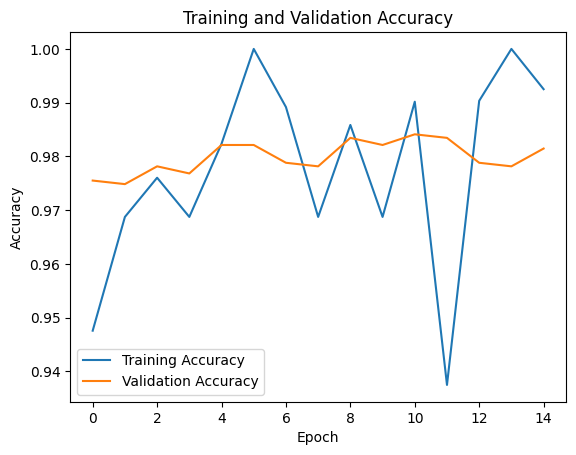

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from PIL import Image


try:
    img_path = '/content/with_mask_3.jpg' # Example path
    img = Image.open(img_path).convert('RGB').resize((128, 128))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    # Make the prediction
    prediction = model.predict(img_array)

    # Interpret the prediction
    if prediction[0][0] > 0.5:
        print(f"Prediction: With Mask (Probability: {prediction[0][0]:.4f})")
    else:
        print(f"Prediction: Without Mask (Probability: {prediction[0][0]:.4f})")

except FileNotFoundError:
    print(f"Error: Image file not found at {img_path}")
except Exception as e:
    print(f"An error occurred: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Prediction: With Mask (Probability: 1.0000)
